# Plot EAfrica on map

[Plotting different colors for different ](https://nbviewer.jupyter.org/gist/jorisvandenbossche/57d392c085901eb4981054402b37b6b1)

[Github issue here](https://github.com/geopandas/geopandas/issues/387)

In [1]:
import geopandas as gpd
from pathlib import Path
import xarray as xr
import numpy as np
import pandas as pd

import cdsapi
import matplotlib.pyplot as plt
import cartopy.crs as crs
import xarray as xr
import seaborn as sns

import os
import subprocess
from functools import partial
from collections import namedtuple
from pprint import pprint

%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 6

In [2]:
# Set working directory as project root
if os.getcwd().split('/')[-1] != "ESoWC_dummy":
    os.chdir('..')
    
assert os.getcwd().split('/')[-1] == "ESoWC_dummy", f"Working directory should be the root (), currently: {os.getcwd()}"
print("Current Directory: ",os.getcwd())

Current Directory:  /Users/tommylees/github/ESoWC_dummy


In [4]:
# Set data_dir to external if on tommy's laptop (no space!)
if os.getcwd().split('/')[2] == 'tommylees':
    data_dir = Path("/Volumes/Lees_Extend/data/ecmwf_sowc/")
else:
    data_dir = Path('./data')
    
print(data_dir)
pprint([f.as_posix().split('/')[-1] for f in data_dir.glob('*')])

/Volumes/Lees_Extend/data/ecmwf_sowc
['chirps_kenya.nc',
 'chirps_kenya2.nc',
 'countries_shp',
 'countries_shp.zip',
 'era5_test.grib',
 'ESACCI-LC-L4-LCCS-Map-300m-P1Y-2015-v2.0.7b.nc',
 'ESACCI-LC-L4-LCCS-Map-300m-P1Y-2015-v2.0.7b.nc.zip',
 'ESACCI-LC-Legend.csv',
 'GRUN_v1_GSWP3_WGS84_05_1902_2014.nc',
 'kenya_precip_JanJune.grib',
 'kenya_rainfall2.nc',
 'kenya_rainfall_.nc',
 'orography.grib',
 'pressure.grib']


In [5]:
pprint([f.as_posix().split('/')[-1] for f in data_dir.glob('*/*')])

['ne_50m_admin_0_countries.cpg',
 'ne_50m_admin_0_countries.dbf',
 'ne_50m_admin_0_countries.prj',
 'ne_50m_admin_0_countries.README.html',
 'ne_50m_admin_0_countries.shp',
 'ne_50m_admin_0_countries.shx',
 'ne_50m_admin_0_countries.VERSION.txt']


In [7]:
countries = gpd.read_file(data_dir/"countries_shp"/"ne_50m_admin_0_countries.shp")
countries.columns

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT',
       'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG',
       'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN',
       'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT',
       'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13',
       'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS',
       'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'WIKIPEDIA', 'FIPS_10_', 'ISO_A2',
       'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID',
       'WOE_ID_EH', 'WOE_NOTE', 'ADM0_A3_IS', 'ADM0_A3_US', 'ADM0_A3_UN',
       'ADM0_A3_WB', 'CONTINENT', 'REGION_UN', 'SUBREGION', 'REGION_WB',
       'NAME_LEN', 'LONG_LEN', 'ABBREV_LEN', 'TINY', 'HOMEPART', 'MIN_ZOOM',
       'MIN_LABEL', 'MAX_LABEL', 'NE_ID', 'WIKIDATAID', 'NAME_AR', 'NAME_BN',
       'NAME_DE', 'NAME_

In [18]:
countries.loc[countries.REGION_UN == 'Africa'].plot()

0                              Zimbabwe
1                                Zambia
19                       United Kingdom
34                               Uganda
37                              Tunisia
40                                 Togo
43          United Republic of Tanzania
49                             eSwatini
51                          South Sudan
52                                Sudan
56                         South Africa
57                              Somalia
58                           Somaliland
63                         Sierra Leone
64                           Seychelles
66                              Senegal
68              SÃ£o TomÃ© and Principe
74                               Rwanda
90                              Nigeria
91                                Niger
101                             Namibia
102                          Mozambique
103                             Morocco
104                      Western Sahara
110                           Mauritius


In [20]:
np.unique(countries.loc[countries.SUBREGION == 'Eastern Africa'].SOVEREIGNT)

array(['Burundi', 'Comoros', 'Djibouti', 'Eritrea', 'Ethiopia', 'Kenya',
       'Madagascar', 'Malawi', 'Mauritius', 'Mozambique', 'Rwanda',
       'Seychelles', 'Somalia', 'Somaliland', 'South Sudan', 'Uganda',
       'United Republic of Tanzania', 'Zambia', 'Zimbabwe'], dtype=object)

In [28]:
e_africa = np.array(['Burundi', 'Djibouti', 'Eritrea', 'Ethiopia', 'Kenya','Rwanda', 'Somalia', 'Somaliland', 'South Sudan', 'Sudan', 'Uganda','United Republic of Tanzania'])
# countries.loc[countries.SOVEREIGNT]


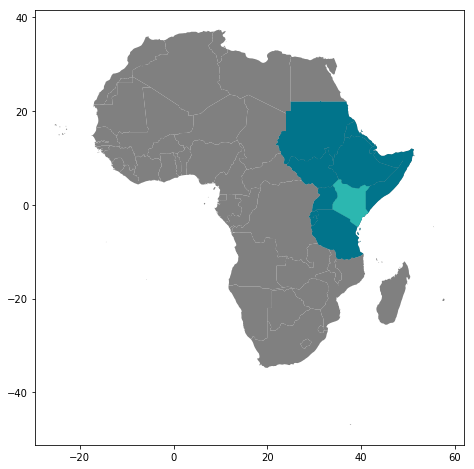

In [52]:
fig,ax= plt.subplots(figsize=(12,8))
countries[countries.REGION_UN == 'Africa'].plot(color='grey', ax=ax)
countries[np.isin(countries.SOVEREIGNT, e_africa)].plot(color='#01748b', ax=ax)
countries[np.isin(countries.SOVEREIGNT, ['Kenya'])].plot(color='#2cb7b0', ax=ax)
fig.savefig('/Users/tommylees/Downloads/africa.svg')

In [ ]:
# https://github.com/geopandas/geopandas/issues/387
# for poly in lsoas['geometry']:
#     gpd.plotting.plot_multipolygon(ax, poly, linewidth=0.1, edgecolor='grey')
# plt.show()